## In this notebook we create two neural networks to predict the salary

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score

# Load the CSV data
path = 'Salary_Data.csv'

df = pd.read_csv(path)
df['Education Level'] = df['Education Level'].replace("Bachelor's Degree", "Bachelor's")
df['Education Level'] = df['Education Level'].replace("phD", "PhD")
df['Education Level'] = df['Education Level'].replace("Master's Degree", "Master's")


df = df.dropna()

df = df[df["Salary"] > 10000]
df = df[df["Salary"] < 230000]



# Features and target
X = df.drop('Salary', axis=1)
y = df['Salary']

scaler = StandardScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))


# Define categorical and numerical columns
categorical_columns = ['Gender', 'Education Level', "Job Title"]
numerical_columns = ['Age', 'Years of Experience']

# Preprocess categorical variables with OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
         ('num', StandardScaler(), numerical_columns)
    ]
)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

C:\Users\carlo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 16371187712.0000 - val_loss: 15703255040.0000
Epoch 2/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 15899106304.0000 - val_loss: 15469509632.0000
Epoch 3/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 15520512000.0000 - val_loss: 14822030336.0000
Epoch 4/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 15020820480.0000 - val_loss: 13627334656.0000
Epoch 5/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 13606333440.0000 - val_loss: 11865650176.0000
Epoch 6/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 11780235264.0000 - val_loss: 9659881472.0000
Epoch 7/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9365142528.0000 - val_loss: 7272940032.0000
Epoch 8/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6929069568.0000 - val_loss: 5026378240.0000
Epoch 9/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4655815168.0000 - val_loss: 3220589312.0000
Epoch 10/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

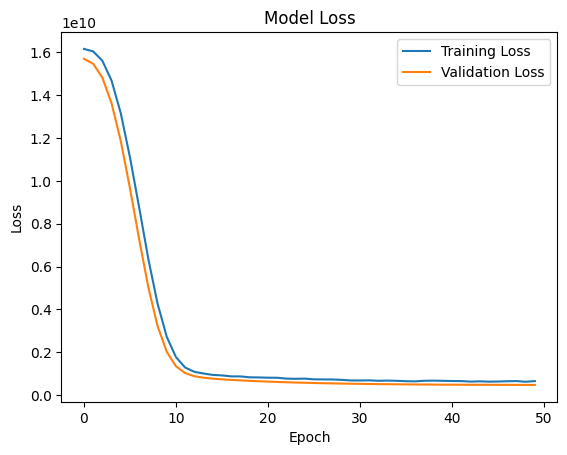

In [55]:
from keras import Sequential
from keras import layers, optimizers
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Create the preprocessor pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
        ('num', StandardScaler(), numerical_columns)
    ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the preprocessor on the training data and transform both training and test data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
y_scaler = StandardScaler()

# Define the neural network model
model = Sequential([
    layers.Dense(64, input_shape=(X_train_processed.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(32),
    layers.Dropout(0.2),
    layers.Dense(1)
])

# Compile the model
optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
history = model.fit(
    X_train_processed, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Make predictions on the test set
y_pred = model.predict(X_test_processed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absoulute Error: {np.sqrt(mse)}")
print(f"R-squared Score: {r2}")

# Optional: Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  


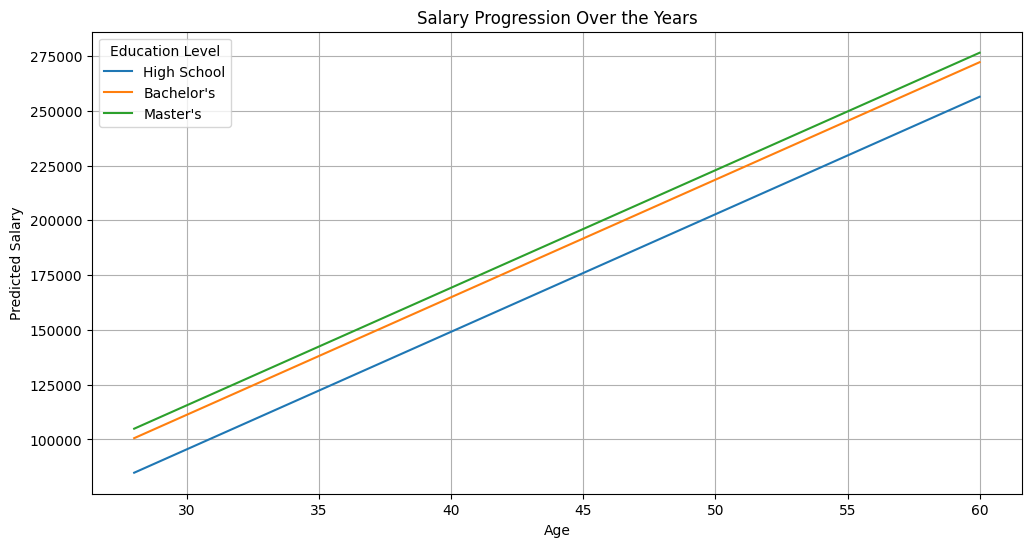

In [56]:
#Create a comparison of the three people
import pandas as pd
import matplotlib.pyplot as plt

# Example fake data generation
start_age = 28
end_age = 60

# Define the template data for the three people
people = [
    {"Gender": "Male", "Education Level": "High School", "Job Title": "Software Engineer", "start_work": 3},
    {"Gender": "Male", "Education Level": "Bachelor's", "Job Title": "Software Engineer", "start_work": 2},
    {"Gender": "Male", "Education Level": "Master's", "Job Title": "Software Engineer", "start_work": 1}
]

# Generate the data for each person over the years
fake_data_list = []
for person in people:
    for age in range(start_age, end_age + 1):
        # Calculate Years of Experience as the difference between the current age and the start age (27)
        years_of_experience = age - start_age
        fake_data_list.append({
            "Age": age,
            "Gender": person["Gender"],
            "Education Level": person["Education Level"],
            "Job Title": person["Job Title"],
            "Years of Experience": years_of_experience + person["start_work"]
        })

# Create a DataFrame from the generated data
fake_data = pd.DataFrame(fake_data_list)
fake_data_processed = preprocessor.transform(fake_data)

predicted_salaries = model.predict(fake_data_processed)
fake_data['Predicted Salary'] = predicted_salaries

# Plot the results
plt.figure(figsize=(12, 6))

# Plot salary progression for each education level
for education_level in fake_data["Education Level"].unique():
    subset = fake_data[fake_data["Education Level"] == education_level]
    plt.plot(subset["Age"], subset["Predicted Salary"], label=f"{education_level}")

# Add plot details
plt.title("Salary Progression Over the Years")
plt.xlabel("Age")
plt.ylabel("Predicted Salary")
plt.legend(title="Education Level")
plt.grid(True)
plt.show()
